In [1]:
import numpy as np
import sdeint
import matplotlib.pyplot as plt

In [73]:
def A_x1x2(x, t):
    global l
    x1, x2 = x
    Ax1 = l*x1*(1-x1-x2) - x1
    Ax2 = l*x2*(1-x1-x2) - x2
    return np.array([Ax1, Ax2])

def B_x1x2(x, t):
    global l, N
    x1, x2 = x
    b11 = np.sqrt((l*x1*(1-x1-x2) + x1)/N)
    b12 = 0
    b21 = 0
    b22 = np.sqrt((l*x2*(1-x1-x2) + x2)/N)
    return np.array([[b11, b12], [b21, b22]])

In [142]:
def A(x, t):
    global l
    rho, m = x
    fx_rho = rho*(l*(1-rho) - 1)
    fx_m = m*(l*(1-rho) - 1)
    return np.array([fx_rho, fx_m])

def B(x, t):
    global l, N
    rho, m = x
    coef = np.sqrt((l*(1-rho)+1)/(2*N))
    b11 = np.sqrt(rho+m)
    b12 = np.sqrt(rho-m)
    b21 = np.sqrt(rho+m)
    b22 = -np.sqrt((rho-m))
    return coef*np.array([[b11, b12], [b21, b22]])

def B_b0(x, t):
    global l, N
    rho, m = x
    alpha = (l*(1-rho)+1)/N
    b11 = np.sqrt(alpha*rho)
    b12 = 0
    b21 = np.sqrt(alpha/rho)*m
    b22 = np.sqrt(alpha*(rho**2 - m**2)/rho)
    # b22 = 0
    return np.array([[b11, b12], [b21, b22]])

def B_bd0(x, t):
    global l, N
    rho, m = x
    alpha = (l*(1-rho)+1)/N
    # b11 = np.sqrt(alpha*rho)
    b11 = np.sqrt(alpha*m)
    b12 = 0
    # b21 = np.sqrt(alpha*rho)
    b21 = np.sqrt(alpha*m)
    b22 = 0
    return np.array([[b11, b12], [b21, b22]])


def B_b_eq_d(x, t):
    global l, N
    rho, m = x
    alpha = (l*(1-rho)+1)/N
    b11 = np.sqrt(rho - m)
    b12 = np.sqrt(rho + m)
    b21 = -np.sqrt(rho - m)
    b22 = np.sqrt(rho + m)
    return np.sqrt(alpha/2)*np.array([[b11, b12], [b21, b22]])


def B_k1k2(x, t):
    global l, N, k1, k2
    rho, m = x
    alpha = (l*(1-rho)+1)/N
    a = (1/np.sqrt(k1 - k2)) * np.sqrt((k2*(1-k2**2))/(1+k1*k2)) * np.sqrt(alpha*m/k1)
    b = np.sqrt(k1**2-1)/np.sqrt((1-k2**2) * (k1 - k2) * k1) * np.sqrt(k2*(1-k2**2)/(1 + k1*k2)) * np.sqrt(alpha*m)
    c = k1*a
    d = k2*b
    return np.array([[a, b], [c, d]])

In [150]:
# vector x == rho, m
l = 1.6
N = 1000

tspan = np.linspace(0.0, 500.0, 1001)

# numerical integration of the Langevin eq's for x1, x2:
x0_x1x2 = [0.6,0.4]
res_x1x2 = sdeint.itoint(A_x1x2, B_x1x2, x0_x1x2, tspan)
rho_x1x2, m_x1x2 = np.array(res_x1x2[:,0]) + np.array(res_x1x2[:,1]), np.array(res_x1x2[:,0]) - np.array(res_x1x2[:,1])

x0 = np.array([0.5, 0.4])
# x0 = np.array([0.5, 0.0])

result = sdeint.itoint(A, B, x0, tspan)
# result2 = sdeint.itoint(A, B_b0, x0, tspan)
result2 = sdeint.itoint(A, B_b_eq_d, x0, tspan)
# result2 = sdeint.itoEuler(A, B_b_eq_d, x0, tspan)
# result2 = sdeint.itoSRI2(A, B_b_eq_d, x0, tspan)

# k1, k2 = 1.1, 0.9
k1, k2 = 1.5, 0.01
resultks = sdeint.itoint(A, B_k1k2, x0, tspan)

/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_30993/2030361813.py:11: RuntimeWarning: invalid value encountered in sqrt
  b11 = np.sqrt((l*x1*(1-x1-x2) + x1)/N)
/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_30993/1205781693.py:13: RuntimeWarning: invalid value encountered in sqrt
  b12 = np.sqrt(rho-m)
/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_30993/1205781693.py:15: RuntimeWarning: invalid value encountered in sqrt
  b22 = -np.sqrt((rho-m))
/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_30993/1205781693.py:47: RuntimeWarning: invalid value encountered in sqrt
  b12 = np.sqrt(rho + m)
/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_30993/1205781693.py:49: RuntimeWarning: invalid value encountered in sqrt
  b22 = np.sqrt(rho + m)


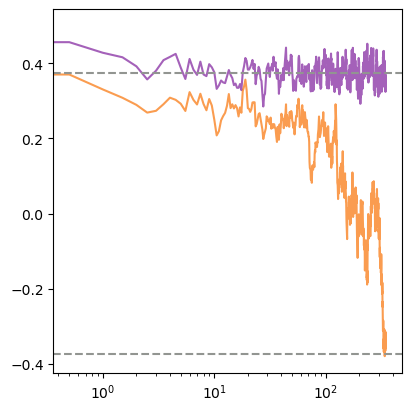

In [151]:
fig, ax = plt.subplots(1, 1, figsize=(4,4), constrained_layout=True)
ax.set(xscale='log')


# ax.plot(tspan, resultks[:,0], color='xkcd:purple') # rho
# ax.plot(tspan, resultks[:,1], color='xkcd:orange') # m

# ax.plot(tspan, result[:,0], color='xkcd:purple') # rho
# ax.plot(tspan, result[:,1], color='xkcd:orange') # m

ax.plot(tspan, result2[:,0], color='xkcd:purple', alpha=0.7) # rho
ax.plot(tspan, result2[:,1], color='xkcd:orange', alpha=0.7) # m


# ax.plot(tspan, rho_x1x2, color='xkcd:cyan') # rho
# ax.plot(tspan, m_x1x2, color='xkcd:gold') # m


ax.axhline(1-1/l, ls='--', color='xkcd:gray')
ax.axhline(-(1-1/l), ls='--', color='xkcd:gray')

In [117]:
resultks[:, 0]

array([0.5, nan, nan, ..., nan, nan, nan])

# Measure the standard deviation in the stationary state

In [106]:
# numerical integration of the Langevin eq's for x1, x2:
x0_x1x2 = [0.6,0.4]
rho_stat_x1x2 = []
for i in range(10):
    res_x1x2 = sdeint.itoint(A_x1x2, B_x1x2, x0_x1x2, tspan)
    rho_x1x2, m_x1x2 = np.array(res_x1x2[:,0]) + np.array(res_x1x2[:,1]), np.array(res_x1x2[:,0]) - np.array(res_x1x2[:,1])
    rho_stat_x1x2.extend(rho_x1x2[10:])


# numerical integration of the transformed langevin with the x1,x2 noises
x0 = np.array([1.0, 0.2])
rho_stat_1 = []
for i in range(10):
    result = sdeint.itoint(A, B, x0, tspan)
    rho_stat_1.extend(result[:,0][10:])

# numerical integration of the langevin resulting from the transformation in the Fokker-Planck equation
# proposing the solution b=0
rho_stat_2 = []
for i in range(10):
    result = sdeint.itoint(A, B_b0, x0, tspan)
    rho_stat_2.extend(result[:,0][10:])

# and forcing also d=0 in the last solution
# rho_stat_3 = []
# for i in range(10):
#     result = sdeint.itoint(A, B_bd0, x0, tspan)
#     rho_stat_3.extend(result[:,0][10:])

# proposing the solution b = d 
rho_stat_3 = []
for i in range(10):
    result = sdeint.itoint(A, B_b_eq_d, x0, tspan)
    rho_stat_3.extend(result[:,0][10:])

/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_30993/2030361813.py:11: RuntimeWarning: invalid value encountered in sqrt
  b11 = np.sqrt((l*x1*(1-x1-x2) + x1)/N)
/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_30993/2030361813.py:14: RuntimeWarning: invalid value encountered in sqrt
  b22 = np.sqrt((l*x2*(1-x1-x2) + x2)/N)
/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_30993/3236718294.py:13: RuntimeWarning: invalid value encountered in sqrt
  b12 = np.sqrt(rho-m)
/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_30993/3236718294.py:15: RuntimeWarning: invalid value encountered in sqrt
  b22 = -np.sqrt((rho-m))
/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_30993/3236718294.py:12: RuntimeWarning: invalid value encountered in sqrt
  b11 = np.sqrt(rho+m)
/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_30993/3236718294.py:25: RuntimeWarning: invalid value encountered in sqrt
  b22 = np.sqrt(alpha*(rho**2 - m**2)/rho)
/var/

In [107]:
rho_stat_x1x2 = np.array(rho_stat_x1x2)
rho_stat_x1x2 = rho_stat_x1x2[~np.isnan(rho_stat_x1x2)]

rho_stat_1 = np.array(rho_stat_1)
rho_stat_1 = rho_stat_1[~np.isnan(rho_stat_1)]

rho_stat_2 = np.array(rho_stat_2)
rho_stat_2 = rho_stat_2[~np.isnan(rho_stat_2)]

rho_stat_3 = np.array(rho_stat_3)
rho_stat_3 = rho_stat_3[~np.isnan(rho_stat_3)]

In [108]:
print(f'Langevin x1, x2:   std rho = {np.std(rho_stat_x1x2)}')
print(f'Langevin rho, m with noise 1,2:   std rho = {np.std(rho_stat_1)}')
print(f'Langevin rho, m (FP, sol b=0):   std rho = {np.std(rho_stat_2)}')
print(f'Langevin rho, m (FP, sol b=0, d=0):   std rho = {np.std(rho_stat_3)}')

Langevin x1, x2:   std rho = 0.027904492039554418
Langevin rho, m with noise 1,2:   std rho = 0.027192084797347478
Langevin rho, m (FP, sol b=0):   std rho = 0.02750033251437859
Langevin rho, m (FP, sol b=0, d=0):   std rho = 0.0273947332419648


# Compare how m looks in the different approaches

/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_30993/2030361813.py:14: RuntimeWarning: invalid value encountered in sqrt
  b22 = np.sqrt((l*x2*(1-x1-x2) + x2)/N)
/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_30993/2030361813.py:11: RuntimeWarning: invalid value encountered in sqrt
  b11 = np.sqrt((l*x1*(1-x1-x2) + x1)/N)
/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_30993/1004109533.py:13: RuntimeWarning: invalid value encountered in sqrt
  b12 = np.sqrt(rho-m)
/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_30993/1004109533.py:15: RuntimeWarning: invalid value encountered in sqrt
  b22 = -np.sqrt((rho-m))
/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_30993/1004109533.py:12: RuntimeWarning: invalid value encountered in sqrt
  b11 = np.sqrt(rho+m)
/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_30993/1004109533.py:25: RuntimeWarning: invalid value encountered in sqrt
  b22 = np.sqrt(alpha*(rho**2 - m**2)/rho)
/var/

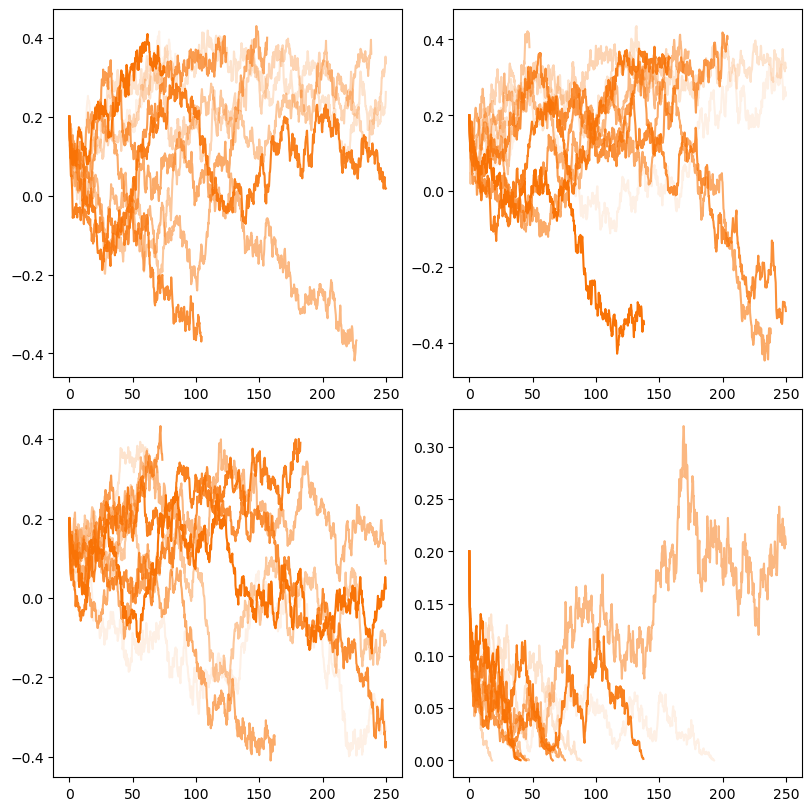

In [102]:
fig, ax = plt.subplots(2,2, figsize=(8,8), constrained_layout=True)

# numerical integration of the Langevin eq's for x1, x2:
x0_x1x2 = [0.6,0.4]
for i in range(10):
    res_x1x2 = sdeint.itoint(A_x1x2, B_x1x2, x0_x1x2, tspan)
    rho_x1x2, m_x1x2 = np.array(res_x1x2[:,0]) + np.array(res_x1x2[:,1]), np.array(res_x1x2[:,0]) - np.array(res_x1x2[:,1])
    ax[0,0].plot(tspan, m_x1x2, color='xkcd:orange', alpha=(i+1)/10)


# numerical integration of the transformed langevin with the x1,x2 noises
x0 = np.array([1.0, 0.2])
for i in range(10):
    result = sdeint.itoint(A, B, x0, tspan)
    ax[0,1].plot(tspan, result[:,1], color='xkcd:orange', alpha=(i+1)/10)

# numerical integration of the langevin resulting from the transformation in the Fokker-Planck equation
# proposing the solution b=0
for i in range(10):
    result = sdeint.itoint(A, B_b0, x0, tspan)
    ax[1,0].plot(tspan, result[:,1], color='xkcd:orange', alpha=(i+1)/10)


# and forcing also d=0 in the last solution
for i in range(10):
    result = sdeint.itoint(A, B_bd0, x0, tspan)
    ax[1,1].plot(tspan, result[:,1], color='xkcd:orange', alpha=(i+1)/10)

# Stratonovich

In [11]:
def A_x1x2_strat(x, t):
    global l, N
    x1, x2 = x
    Ax1 = l*x1*(1-x1-x2) - x1 - (l*(1-x2-2*x1) + 1)/(4*N)
    Ax2 = l*x2*(1-x1-x2) - x2 - (l*(1-x1-2*x2) + 1)/(4*N)
    return np.array([Ax1, Ax2])

def B_x1x2_strat(x, t):
    global l, N
    x1, x2 = x
    b11 = np.sqrt((l*x1*(1-x1-x2) + x1)/N)
    b12 = 0
    b21 = 0
    b22 = np.sqrt((l*x2*(1-x1-x2) + x2)/N)
    return np.array([[b11, b12], [b21, b22]])


def A_rhom_strat(x, t):
    global l, N
    rho, m = x
    Arho = rho * (l*(1- rho) - 1) - 1/(2*N) - l/(4*N)*(2 - 3*rho)
    Am = m * (l*(1- rho) - 1) + l*m/(4*N)
    return np.array([Arho, Am])

def B_rhom_strat(x, t):
    global l, N
    rho, m = x
    b11 = np.sqrt( (rho+m)/2 * (l*(1-rho) + 1) / N)
    b12 = 0
    b21 = 0
    b22 = -np.sqrt((rho-m)/2 * (l*(1-rho) + 1) / N)
    b12 = -b22
    b21 = b11
    return np.array([[b11, b12], [b21, b22]])

In [23]:
l = 1.6
N = 1000

tspan = np.linspace(0.0, 500.0, 1001)

# numerical integration of the Langevin eq's for x1, x2:
# x0_x1x2 = [0.6,0.4]
# res_x1x2 = sdeint.itoint(A_x1x2_strat, B_x1x2_strat, x0_x1x2, tspan)
# rho_x1x2, m_x1x2 = np.array(res_x1x2[:,0]) + np.array(res_x1x2[:,1]), np.array(res_x1x2[:,0]) - np.array(res_x1x2[:,1])

# for rho,m
rhom0 = [1.0,0.2]
res = sdeint.stratint(A_rhom_strat, B_rhom_strat, rhom0, tspan)

/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_33503/564158928.py:31: RuntimeWarning: invalid value encountered in sqrt
  b22 = -np.sqrt((rho-m)/2 * (l*(1-rho) + 1) / N)


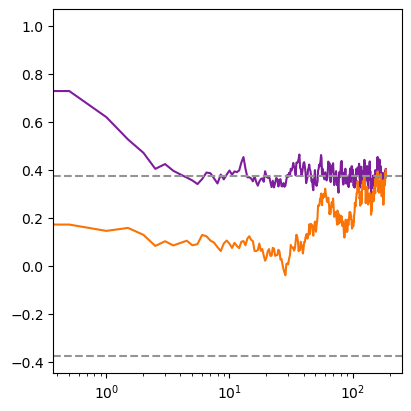

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(4,4), constrained_layout=True)
ax.set(xscale='log')

# ax.plot(tspan, rho_x1x2, color='xkcd:purple') # rho
# ax.plot(tspan, m_x1x2, color='xkcd:orange') # m

ax.plot(tspan, res[:,0], color='xkcd:purple') # rho
ax.plot(tspan, res[:,1], color='xkcd:orange') # m

ax.axhline(1-1/l, ls='--', color='xkcd:gray')
ax.axhline(-(1-1/l), ls='--', color='xkcd:gray')